### Problem 01 - Airlines Data
Forecast the Airlines Data prices. Prepare a document for each model explaining,how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

#### 1. Importing Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, StandardScaler
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.formula.api as smf 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#### 2. Importing the Data set

In [5]:
data = pd.read_csv('Airlines_Data.csv')
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [6]:
data_1 = pd.read_csv('Airlines_Data.csv')
data_1.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [7]:
a = data_1.Month.replace(to_replace={'-9':'-199','-0':'-200'}, regex=True)
a = pd.DataFrame(data=a)
data_1['Month'] = a
data_1

,Month,Passengers
0,Jan-1995,112
1,Feb-1995,118
2,Mar-1995,132
3,Apr-1995,129
4,May-1995,121
...,...,...
91,Aug-2002,405
92,Sep-2002,355
93,Oct-2002,306
94,Nov-2002,271


In [8]:
data_1['Month'] = '01-' + data_1['Month'].astype(str)
data_1

,Month,Passengers
0,01-Jan-1995,112
1,01-Feb-1995,118
2,01-Mar-1995,132
3,01-Apr-1995,129
4,01-May-1995,121
...,...,...
91,01-Aug-2002,405
92,01-Sep-2002,355
93,01-Oct-2002,306
94,01-Nov-2002,271


In [9]:
data_1['Month'] = pd.to_datetime(data_1['Month'])
data_1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#### 3. Data Understanding

In [10]:
data_1.shape

(96, 2)

In [11]:
data_1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [12]:
data_1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [13]:
data_1.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


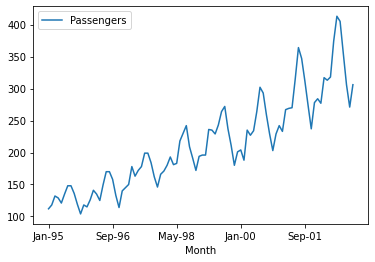

In [14]:
series = pd.read_csv('Airlines_Data.csv', header=0, index_col=0,parse_dates=True)
series.plot()
plt.show()

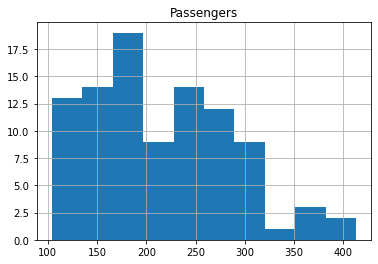

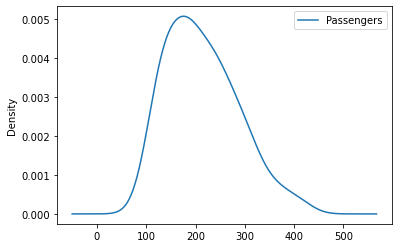

In [15]:
series.hist()
series.plot(kind='kde')
plt.show()

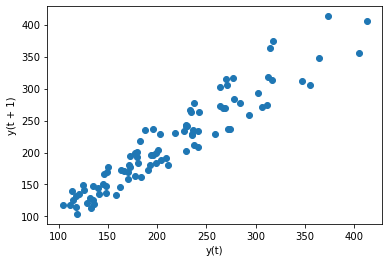

In [16]:
lag_plot(series)
plt.show()

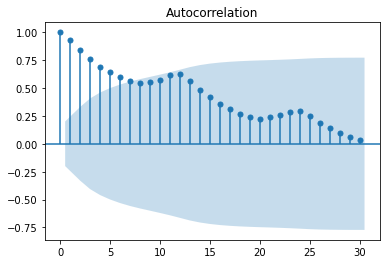

In [17]:
plot_acf(series,lags=30)
plt.show()

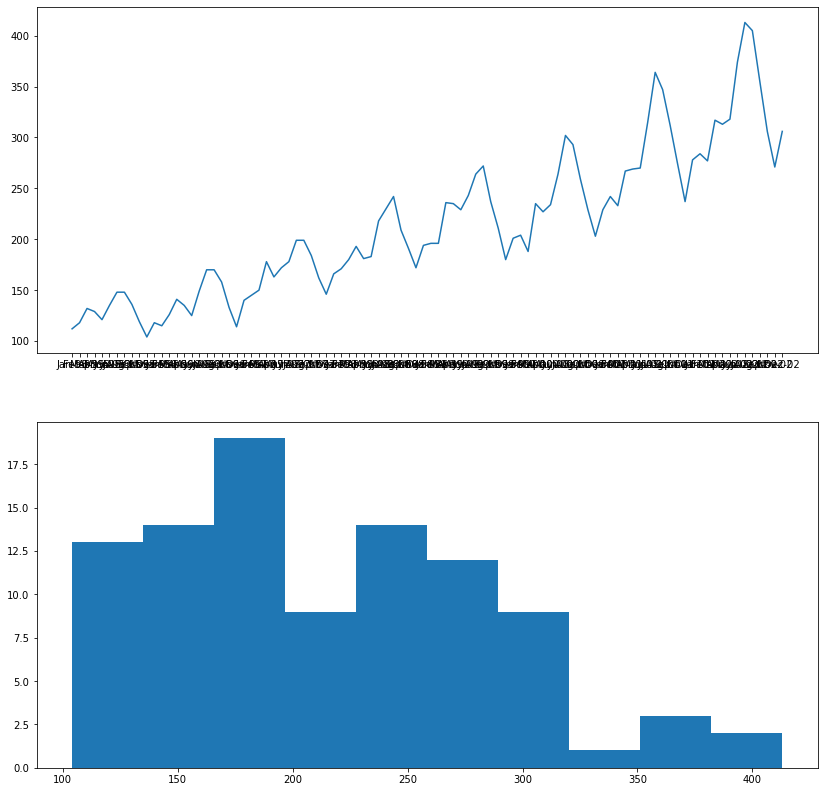

In [18]:
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show()

In [19]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

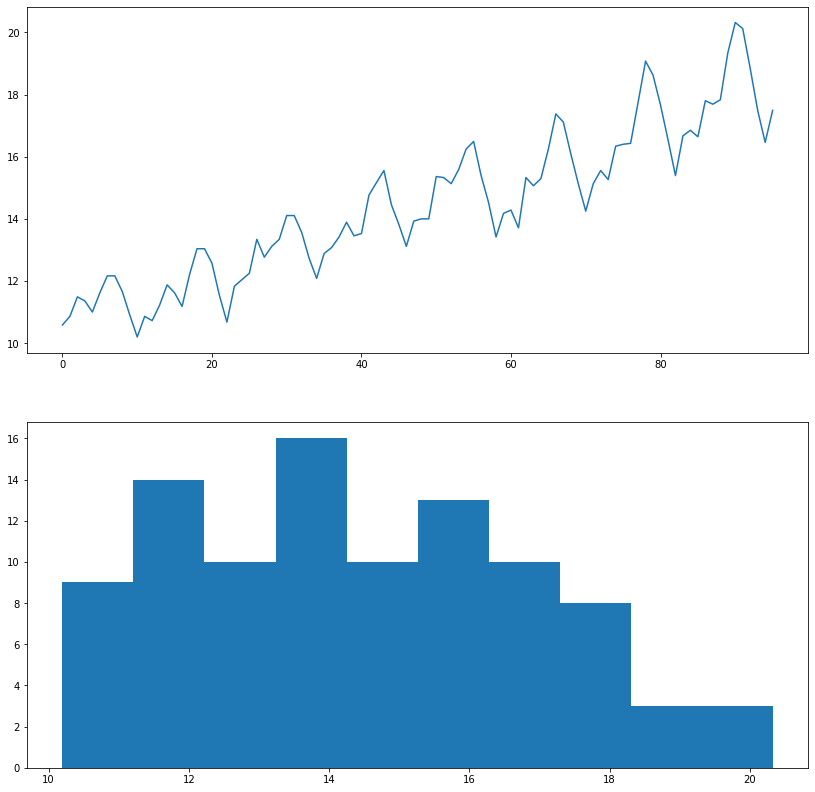

In [20]:
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

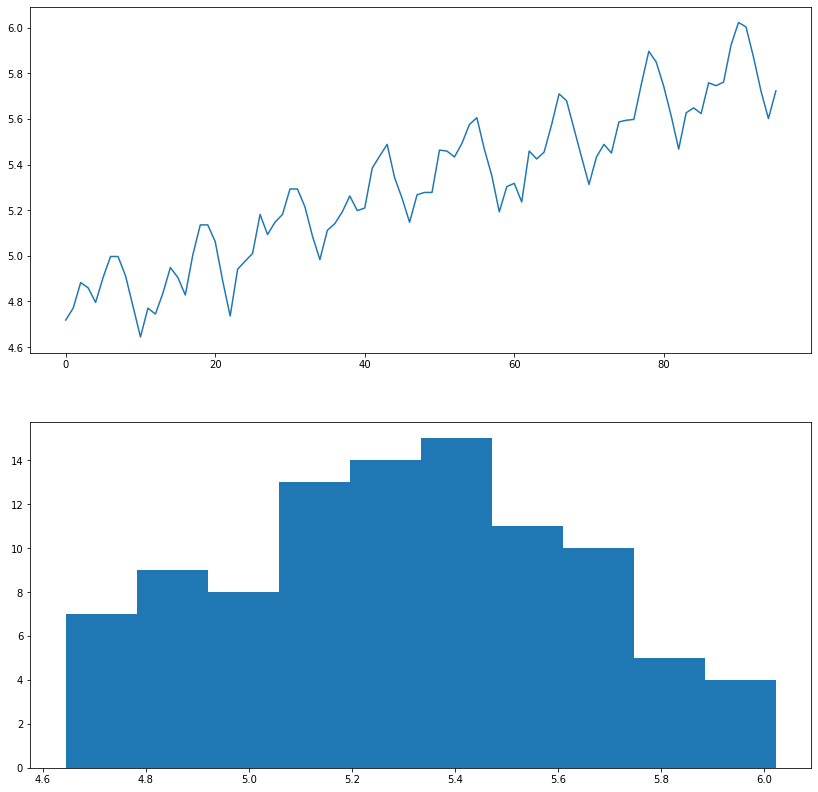

In [21]:
dataframe = pd.DataFrame(series.values)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.log(dataframe['Passengers'])
plt.figure(figsize=(14,14))
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

#### 4. Data Preparation 

In [22]:
Train_1 = data_1.head(84)
Test_1 = data_1.tail(12)

In [23]:
data.tail()

,Month,Passengers
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271
95,Dec-02,306


In [24]:
data_2 = pd.get_dummies(data, columns = ['Month'])
data_2.head()

,Passengers,Month_Apr-00,Month_Apr-01,Month_Apr-02,Month_Apr-95,Month_Apr-96,Month_Apr-97,Month_Apr-98,Month_Apr-99,Month_Aug-00,...,Month_Oct-98,Month_Oct-99,Month_Sep-00,Month_Sep-01,Month_Sep-02,Month_Sep-95,Month_Sep-96,Month_Sep-97,Month_Sep-98,Month_Sep-99
0,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data_2.columns = ['Passengers','Apr','Apr','Apr','Apr','Apr','Apr','Apr','Apr','Aug','Aug','Aug','Aug','Aug','Aug','Aug','Aug','Dec','Dec','Dec','Dec','Dec','Dec','Dec','Dec','Feb','Feb','Feb','Feb','Feb','Feb','Feb','Feb','Jan','Jan','Jan','Jan','Jan','Jan','Jan','Jan','Jul','Jul','Jul','Jul','Jul','Jul','Jul','Jul','Jun','Jun','Jun','Jun','Jun','Jun','Jun','Jun','Mar','Mar','Mar','Mar','Mar','Mar','Mar','Mar','May','May','May','May','May','May','May','May','Nov','Nov','Nov','Nov','Nov','Nov','Nov','Nov','Oct','Oct','Oct','Oct','Oct','Oct','Oct','Oct','Sep','Sep','Sep','Sep','Sep','Sep','Sep','Sep']

In [26]:
t= np.arange(1,97)

In [27]:
data_2['t'] = t

In [28]:
data_2['t_sq'] = data_2['t']*data_2['t']

In [29]:
log_Pass=np.log(data_2['Passengers'])

In [30]:
data_2['log_Passengers']=log_Pass

In [31]:
data_2.head()

,Passengers,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Aug,...,Sep,Sep,Sep,Sep,Sep,Sep,Sep,t,t_sq,log_Passengers
0,112,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [32]:
data_2.tail()

,Passengers,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Apr,Aug,...,Sep,Sep,Sep,Sep,Sep,Sep,Sep,t,t_sq,log_Passengers
91,405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,95,9025,5.602119
95,306,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,96,9216,5.723585


In [33]:
Train_2 = data_2.head(84)
Test_2 = data_2.tail(12)

#### 5. Model Preparation|6. Model Building | 7.Model Testing 

##### 1. Model Driven

In [34]:
#Linear Model
linear_model = smf.ols('Passengers ~ t',data=Train_2).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test_2['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.199236534802715

In [35]:
#Exponential

Exp = smf.ols('log_Passengers ~ t',data=Train_2).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_2['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.0573611031562

In [36]:
#Quadratic 

Quad = smf.ols('Passengers~t_sq',data=Train_2).fit()
pred_Quad = pd.Series(Quad.predict(Test_2[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

46.908141818245724

In [37]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec',data=Train_2).fit()
pred_add_sea = pd.Series(add_sea.predict(Test_2[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

140.88699951402384

In [38]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec',data=Train_2).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test_2[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.4202447579234

In [39]:
#Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec',data = Train_2).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test_2))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

157.4224401164201

In [40]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t + Jan + Feb + Mar + Apr + May + Jun + Jul + Aug + Sep + Oct + Nov + Dec',data = Train_2).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test_2))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test_2['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

61.69665373340235

In [41]:
#Compare the results 
data_comp = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,46.057361
2,rmse_Quad,46.908142
4,rmse_add_sea_quad,50.420245
0,rmse_linear,53.199237
6,rmse_Mult_add_sea,61.696654
3,rmse_add_sea,140.887000
5,rmse_Mult_sea,157.422440


##### 2. Data Driven

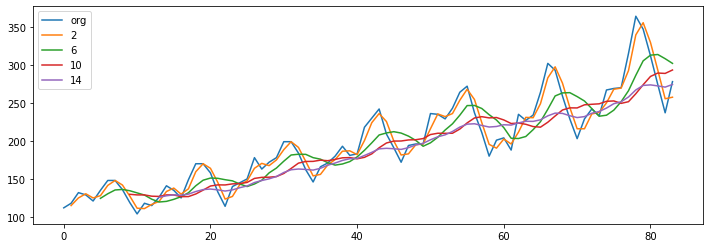

In [42]:
plt.figure(figsize=(12,4))
Train_1.Passengers.plot(label="org")
for i in range(2,16,4):
    Train_1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [43]:
# Evaluation Metric RMSE
def RMSE(pred,org): 
    temp = np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return np.mean(temp)

In [44]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train_1["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_ses = RMSE(pred_ses,Test_1.Passengers) 

In [45]:
# Holt method 
hw_model = Holt(Train_1["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hw = RMSE(pred_hw,Test_1.Passengers) 

In [46]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train_1["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hwe_add_add = RMSE(pred_hwe_add_add,Test_1.Passengers) 

In [47]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train_1["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test_1.index[0],end = Test_1.index[-1])
RMSE_hwe_mul_add = RMSE(pred_hwe_mul_add,Test_1.Passengers)

In [48]:
#Compare the results 

data_comp = {"MODEL":pd.Series(["Simple Exponential Method","Holt method ","Holts winter exponential smoothing with additive seasonality and additive trend","Holts winter exponential smoothing with multiplicative seasonality and additive trend"]),"RMSE_Values":pd.Series([RMSE_ses,RMSE_hw,RMSE_hwe_add_add,RMSE_hwe_mul_add])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,Holts winter exponential smoothing with multip...,12.921284
2,Holts winter exponential smoothing with additi...,28.793915
0,Simple Exponential Method,64.844764
1,Holt method,95.766745


##### 3. ARIMA

In [49]:
arr_Train_1 = np.array(Train_1['Passengers'])

In [50]:
arr_Test_1 = np.array(Test_1['Passengers'])

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
data_3_train = Train_1.drop(labels = 'Month', axis =1)
data_3_test = Test_1.drop(labels = 'Month', axis =1)
data_3_train.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [54]:
#Multiplicative
mul_result = seasonal_decompose(data_3_train['Passengers'], model ='multiplicable', period=4)

#Additive
add_result = seasonal_decompose(data_3_train['Passengers'], model ='Additive', period=4)


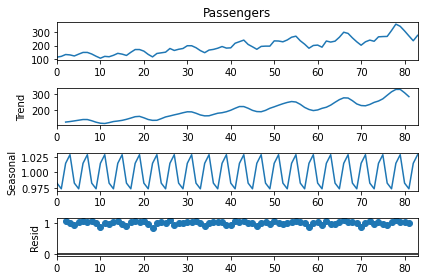

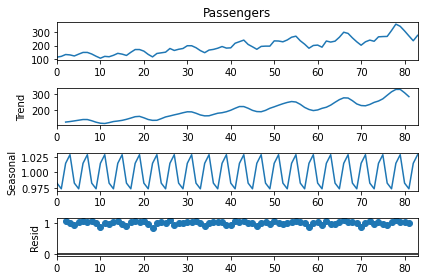

In [55]:
mul_result.plot()

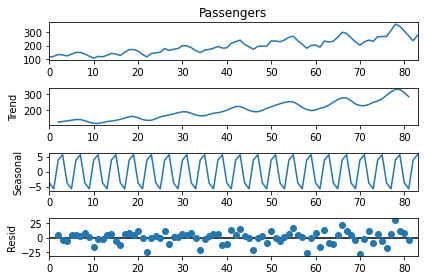

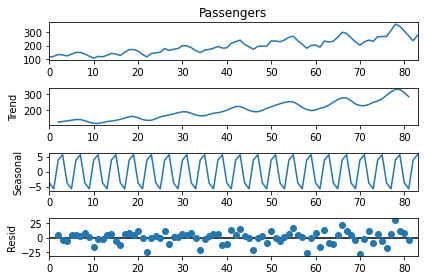

In [56]:
add_result.plot()

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
adfuller_results = adfuller(data_3_train, autolag ='AIC')
print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value : {adfuller_results[1]}' )
for key, value in adfuller_results[4].items():
    print("critical Value")
    print(f'{key},{value}')

ADF Statistic: 0.9666721659561973
p-value : 0.9939015526143222
critical Value
1%,-3.526004646825607
critical Value
5%,-2.9032002348069774
critical Value
10%,-2.5889948363419957


In [59]:
# p value is greater than 0.05 thus we fail to reject null hypothesis that is Series is Non Stationary

In [60]:
# from the graph we can observe that series is predominated by seasonal component

In [79]:
data_3_train.head(10)

,Passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


<AxesSubplot:>

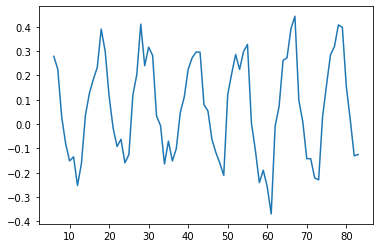

In [183]:
data_3_train['new_Pass_log_diff'] = np.log(data_3_train['Passengers']) - np.log(data_3_train['Passengers']).shift(6)
data_3_train['new_Pass_log_diff'].plot()

In [184]:
data_3_train.head(10)

,Passengers,new_Pass_log_diff
0,112,NaN
1,118,NaN
2,132,NaN
3,129,NaN
4,121,NaN
5,135,NaN
6,148,0.278713
7,148,0.226528
8,136,0.029853
9,119,-0.080689


In [185]:
adfuller_results = adfuller(data_3_train['new_Pass_log_diff'].dropna(), autolag ='AIC')
print(f'ADF Statistic: {adfuller_results[0]}')
print(f'p-value : {adfuller_results[1]}' )
for key, value in adfuller_results[4].items():
    print("critical Value")
    print(f'{key},{value}')

ADF Statistic: -2.628151306780611
p-value : 0.08731741738827942
critical Value
1%,-3.5274258688046647
critical Value
5%,-2.903810816326531
critical Value
10%,-2.5893204081632653


In [186]:
data_3_train['new_Pass_log_diff'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: new_Pass_log_diff, dtype: float64

In [187]:
# walk-forward validation
history = [x for x in np.array(data_3_train['Passengers'])]
predictions = list()
for i in range(len(np.array(data_3_test['Passengers']))):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = arr_Test_1[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(arr_Test_1, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=278.000, Expected=284.000
>Predicted=284.000, Expected=277.000
>Predicted=277.000, Expected=317.000
>Predicted=317.000, Expected=313.000
>Predicted=313.000, Expected=318.000
>Predicted=318.000, Expected=374.000
>Predicted=374.000, Expected=413.000
>Predicted=413.000, Expected=405.000
>Predicted=405.000, Expected=355.000
>Predicted=355.000, Expected=306.000
>Predicted=306.000, Expected=271.000
>Predicted=271.000, Expected=306.000
RMSE: 33.909


In [188]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [189]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(arr_Train_1, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [190]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [191]:
arr_Train_3 = np.array(data_3_train['new_Pass_log_diff'].dropna())

In [192]:
evaluate_models(arr_Train_3, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.790
ARIMA(0, 1, 0) RMSE=26.206
ARIMA(0, 1, 1) RMSE=25.582
ARIMA(0, 1, 2) RMSE=28.099
ARIMA(0, 1, 3) RMSE=23.953
ARIMA(0, 1, 4) RMSE=22.830
ARIMA(0, 2, 0) RMSE=32.545
ARIMA(0, 2, 1) RMSE=26.939
ARIMA(0, 2, 2) RMSE=26.175
ARIMA(0, 2, 3) RMSE=28.230
ARIMA(0, 2, 4) RMSE=25.211
ARIMA(1, 0, 0) RMSE=26.445
ARIMA(1, 0, 1) RMSE=25.611
ARIMA(1, 1, 0) RMSE=25.940
ARIMA(1, 2, 0) RMSE=31.784
ARIMA(2, 0, 0) RMSE=25.991
ARIMA(2, 1, 0) RMSE=25.659
ARIMA(2, 2, 0) RMSE=30.766
ARIMA(3, 0, 0) RMSE=25.820
ARIMA(3, 0, 1) RMSE=25.250
ARIMA(3, 1, 0) RMSE=25.765
ARIMA(3, 2, 0) RMSE=30.978
ARIMA(4, 0, 0) RMSE=26.056
ARIMA(4, 1, 0) RMSE=25.190
ARIMA(4, 2, 0) RMSE=29.503
ARIMA(4, 2, 1) RMSE=25.848
Best ARIMA(0, 1, 4) RMSE=22.830


In [193]:
# load data
train = read_csv('Airlines_Data.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = arr_Train_3.astype('float32')
arr_Test_1_float = arr_Train_1.astype('float32')

In [194]:
# fit model
model = ARIMA(X, order=(0,1,4))
model_fit = model.fit(disp=0)
forecast=model_fit.forecast(steps=8)[0]

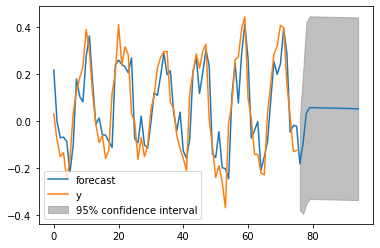

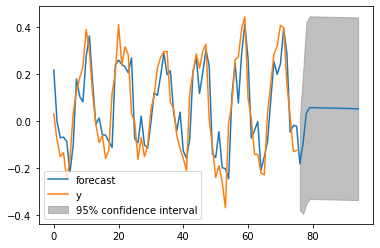

In [195]:
model_fit.plot_predict(2, 96)

In [197]:
evaluate_arima_model(arr_Train_3, (0,1,4))

0.13178985241692578

#### 8. Output Interpretation, Results Comparison and Conclusion

In [198]:
#Compare the results (Model Base Method)
data_comp = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,46.057361
2,rmse_Quad,46.908142
4,rmse_add_sea_quad,50.420245
0,rmse_linear,53.199237
6,rmse_Mult_add_sea,61.696654
3,rmse_add_sea,140.887000
5,rmse_Mult_sea,157.422440


In [199]:
#Compare the results (Data Driven Model)
data_comp = {"MODEL":pd.Series(["Simple Exponential Method","Holt method ","Holts winter exponential smoothing with additive seasonality and additive trend","Holts winter exponential smoothing with multiplicative seasonality and additive trend"]),"RMSE_Values":pd.Series([RMSE_ses,RMSE_hw,RMSE_hwe_add_add,RMSE_hwe_mul_add])}
table_rmse=pd.DataFrame(data_comp)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,Holts winter exponential smoothing with multip...,12.921284
2,Holts winter exponential smoothing with additi...,28.793915
0,Simple Exponential Method,64.844764
1,Holt method,95.766745


In [202]:
#Compare the results (ARIMA Model)
evaluate_arima_model(arr_Train_3, (0,1,4))

0.13178985241692578